<div style="text-align: center;">
   <font size="5"> 2022年度　数式処理演習　pair試験問題 </font>
</div>
   <div style="text-align: right;">
   <font size="3"> cc by Shigeto R. Nishitani, 2022/11/24実施 </font>
</div>

- file: ~/symbolic_math/22_pair/22_pair_ans.ipynb
- make problem: ruby text_dir/bin/pick_works_from_ans.rb 22_pair/22_pair_ans.ipynb -1 '27' '8 9 10 28 32'

以下の問題を python で解き，LUNA へ提出せよ．LUNA へは ipynb と pdf 形式の２種類を提出すること．


# 問 1 微積分

## 1(a) 関数の概形(15 点)

（テキスト p.144 の図 4.35 の確認)

ガウス関数

\begin{equation*}
y= \exp\left(-\frac{x^2}{2 {\rm sigma}^2}\right)
\end{equation*}

の概形を

```python
sigma = 2
plt.xlim(-10,10)
plt.ylim(-0.5,1.5)
```

で描け．


## 1(b) 関数の積分(15 点)

sympy において，

```python
sigma = symbols('sigma',positive = True)
```

を指定することで，
\begin{equation*}
\int_{-\infty}^{\infty} \exp\left(-\frac{x^2}{2\sigma^2}\right) dx
\end{equation*}
を求めよ．


# 問 2 線形代数

## 2(a) 共分散の逆行列(15 点)

ここでは$\Sigma$を共分散とする．
sigma = np.array([[2,1],[1,2]])
の逆行列$\Sigma^{-1}$を求めよ．

さらに検算せよ．


## 2(b) 一般的な 2 次元ガウス関数(15 点)

さらに，sympy で
v = Matrix([x0,x1])
として，
$v^{T} \Sigma^{-1} v$を求めよ．

得られた式を$\exp$の指数部に入れて規格化した関数の 3d プロットは以下の通りとなる（テキストp.150, 図4.37）

注意 ：： 配列同士の内積にはテキストでは，
numpy.matmulのoperator　’＠’を使っている．
2次元配列(行列)の内積では，　numpy.dotから呼び出され同じ結果を返す．
マニュアルではmatmulの使用を推奨している( https://numpy.org/doc/stable/reference/generated/numpy.dot.html#numpy.dot )．

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def gauss(x0, x1, mu, sigma):
    x = np.array([x0,x1])
    a=1/(2*np.pi)*1/(np.linalg.det(sigma) ** (1/2))
    inv_sigma = np.linalg.inv(sigma)
    y=a * np.exp(
        (-1/2)*(x-mu).T @ inv_sigma @(x-mu))
    return y

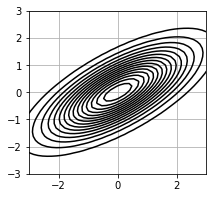

In [6]:
mu=np.array([0,0])
sigma =np.array([[2,1],[1,1]])
x0_min, x0_max = -3,3
x1_min, x1_max = -3,3

x0_n, x1_n = 40, 40
x0 =np.linspace(x0_min,x0_max, x0_n)
x1 =np.linspace(x1_min,x1_max, x1_n)

f = np.zeros((x1_n, x0_n))
for i0 in range(x0_n):
    for i1 in range(x1_n):
        f[i1,i0] = gauss(x0[i0],x1[i1], mu, sigma)
xx0, xx1 = np.meshgrid(x0,x1)

plt.figure(figsize=(7,3))

plt.subplot(1,2,1)
cont = plt.contour(xx0, xx1, f, levels=15, colors="black")
plt.grid()


# 問 3 センター試験原題(20 点)

(2020 大学入試センター試験　数学 II・B/追試験 第 2 問)

$a, b, c$ を実数とし，
関数$f(x)=x^3 -1$, $g(x) = x^3+ax^2+bx+x$を考える．
座標平面上の曲線$y=f(x)$を$C_1$とし,
曲線$y=g(x)$ を$C_2$とする．
$C_2$は点 A(-1,-2)を通り，
$C_2$の A における接線は
$C_1$の A における接線と一致するものとする．

(1) 曲線$C_1$の点 A における接線を$l$とする．
$f'(-1) = \fbox{ ア }$により，
$l$の方程式は
$y=\fbox{ イ }x + \fbox{ ウ }$である．
また，原点 O の直線$l$の距離は
$\frac{\sqrt{\fbox{ エオ }}}{\fbox{ エオ }}$である．

ヒント：問４での数値改変に備えて，x0=-1, y0=f.subs({x:x0})として問題を解いていけ．


(2) 曲線$C_2$の点 A における接線は(1)の直線$l$と一致しているので，
$g'(-1) = \fbox{ カ }$である．
したがって，$b,c$を$a$を用いて表すと，
$b=\fbox{ キ }a$, $c= \fbox{ ク }-\fbox{ ケ }$となる．


(3) $a=-2$のとき，関数$g(x)$は
$\frac{\fbox{ コサ }}{\fbox{ シ }}$で極大値
$\frac{\fbox{ スセソ }}{\fbox{ タチ }}$をとり，
$\fbox{ ツ }$で極小値
$\fbox{ テトナ }$をとる．

## 解答注意
- 極大値は浮動小数点数でも良い．(分数で出したかったらRationalを使え)
- $\fbox{ ア }, \fbox{ イ }, \fbox{ ウ }, \ldots$ を明示する(あるいは書き出す)必要はない．
- 以下は関数$f(x), g(x: a=-2, x0=-1)$のplotである．解答の検算の参考とせよ．

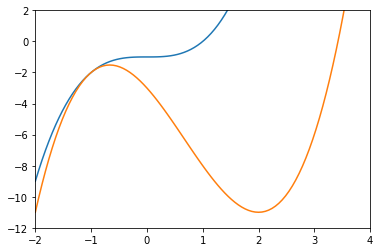

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

g_curve = x**3 - 2*x**2 - 4*x - 3
xx_n = 100
xx =np.linspace(-2, 4, xx_n)

gY = np.zeros(xx_n)
fY = np.zeros(xx_n)
for i0 in range(xx_n):
    gY[i0] = g_curve.subs({x:xx[i0]})
    fY[i0] = f.subs({x:xx[i0]})

plt.plot(xx, fY)
plt.plot(xx, gY)
plt.xlim(-2,4)
plt.ylim(-12,2)
plt.show()

# 問 4 センター試験改変(20 点)

点 A の$x$座標を$-1/2$として同様に求めると，
$a=-2$では$g(x)= x^3 - 2x^2 - 2x - 3/2$となることを確かめよ．

<!--- また，その時でも2つの曲線は$-2 \leqq x \leqq 1$で交差しないことを確かめよ．--->

さらに, 点 A の$x$座標が$-1.1$で, $a=-2$の時の$g(x)$を求めよ．
f(x)およびg(x; a=-2, x0=-1.1)を同時プロットすると以下の通りとなる．

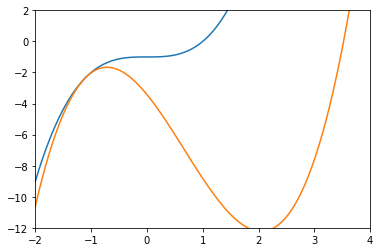

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

xx_n = 100
xx =np.linspace(-2, 4, xx_n)

gY = np.zeros(xx_n)
fY = np.zeros(xx_n)
for i0 in range(xx_n):
    gY[i0] = g_curve.subs({x:xx[i0]})
    fY[i0] = f.subs({x:xx[i0]})

plt.plot(xx, fY)
plt.plot(xx, gY)
plt.xlim(-2,4)
plt.ylim(-12,2)
plt.show()